In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n0=1
k=1.381e-23
T0=0
m0=4*1.66054e-27
m=9.11e-31
E=1e-21*n0
q=1.602e-19

In [76]:
n=1000
B=np.zeros((n,1))
A=np.zeros((n,n))

vmin=1e3
vmax=1*np.sqrt(24*1.602e-19/m)
v=np.logspace(np.log10(vmin),np.log10(vmax),n)
v=np.reshape(v,(n,1))
ratio=(vmax/vmin)**(1.0/(n-1))
dv=v[1:]-v[:n-1] #v*(ratio-1)

In [77]:
np.shape(v)

(1000, 1)

In [78]:
def vm(v):
    return 5e-20*n0*np.sqrt(2/m*1.6e-19)
def dvm(v):
    return 0

In [89]:
def a(v):
    return k*T0*vm(v)/m0 + q**2*E**2/(3*vm(v))
def b(v):
    return v**3*vm(v)*m/(m0*v**2) + 2*v*q**2*E**2/(m*vm(v))/(3*m*v**2)#(k*T0*(2*v*vm(v)+v**2*dvm(v))/m + v**3*vm(v))*m/(m0*v**2) -q*E*(v**2*q*E*dvm(v)/(m*vm(v)**2) - 2*v*q*E/(m*vm(v)))/(3*m*v**2)
def c(v):
    return m*((2*v*vm(v)+v**2*dvm(v))*v + v**2*vm(v))/(m0*v**2)

In [90]:
def alpha(i):
    return a(v[i])/dv[i-1]**2
def beta(i):
    return -(2*a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1])
def gamma(i):
    return a(v[i])/dv[i-1]**2+b(v[i])/dv[i-1]+c(v[i])

In [91]:
A[0,0]=1
A[0,1]=-1
for i in range(1,n-1):
    A[i,i-1]=alpha(i)
    A[i,i]=beta(i)
    A[i,i+1]=gamma(i)
A[n-1,n-1]=1

In [92]:
'''value, vector=np.linalg.eig(A)
print(A,'\n')
print(value)
plt.plot(value)
plt.show()
#print(value)
plt.plot(vector[n-2,:])
plt.show()'''

"value, vector=np.linalg.eig(A)\nprint(A,'\n')\nprint(value)\nplt.plot(value)\nplt.show()\n#print(value)\nplt.plot(vector[n-2,:])\nplt.show()"

In [93]:
import scipy
from scipy import linalg, matrix
def null(A, eps=1e-15):
    u, s, vh = scipy.linalg.svd(A)
    null_mask = (s <= eps)
    null_space = scipy.compress(null_mask, vh, axis=0)
    return scipy.transpose(null_space)

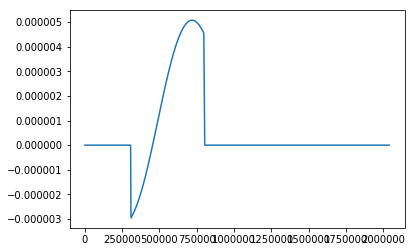

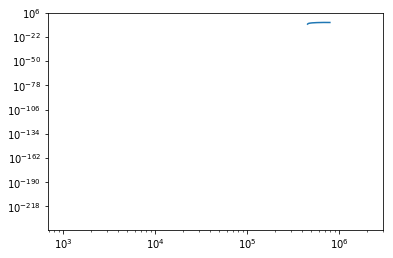

In [105]:
f0=null(A,3e-17)[:n-1]
f0=f0/np.sum(f0*dv) #Normalising f0
plt.plot(v[:n-1],f0)
plt.show()
plt.loglog(v[:n-1],f0)
plt.show()

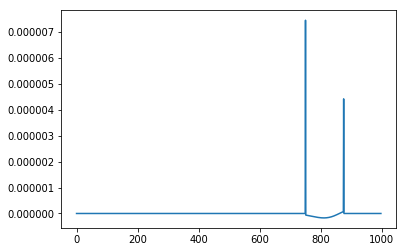

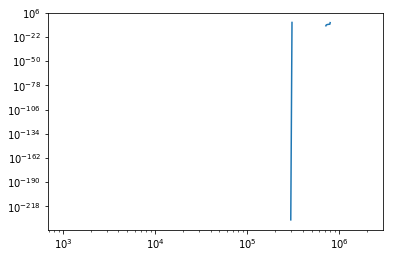

In [106]:
f1=-q*E*(f0[1:]-f0[:n-2])/dv[:n-2]/(m*vm(v[:n-2]))
plt.plot(f1[:n-2])
plt.show()
plt.loglog(v[:n-2],f1[:n-2])
plt.show()

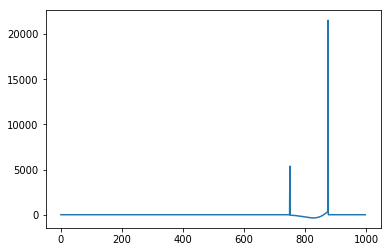

In [107]:
W=np.sum(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.plot(dv[:n-2]*f1[:n-2]*v[:n-2])
plt.show()

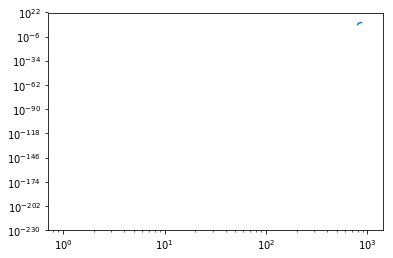

In [110]:
eps=np.sum(0.5*m*v[:n-1]**2*f0*dv)/2#np.sum(0.5*m*v**2*f0*dv)
plt.loglog(v[:n-1]**2*f0*dv)
plt.show()

In [111]:
print(W/1e4,eps/1.6e-19)

0.588901060067 0.75637897125


In [112]:
W0=0.593e4
eps0=0.7291*1.6e-19

In [113]:
print((1-W/W0)*100,(1-eps/eps0)*100)

0.691220899296 -3.74145813329


2.88680842283e-67


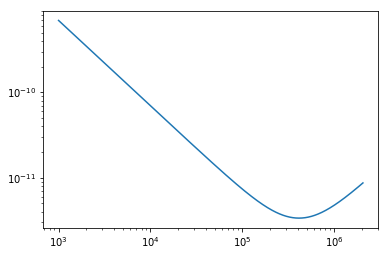

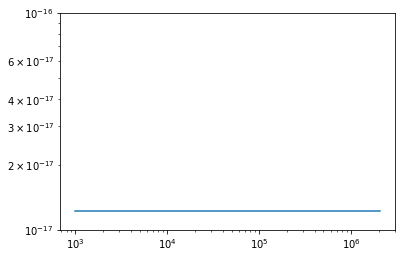

In [119]:
print(a(v))
plt.loglog(v,b(v))
plt.show()
plt.loglog(v,c(v))
plt.show()